# NLP Analysis: TF-IDF Vectorization with Multinomial and Logistic Regression.

**Author - Lasya Nayani Bhatta**

In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [27]:
file_path = 'C:/Users/MANOJ/Downloads/Food_Inspections_20240106.csv'

In [28]:
data = pd.read_csv(file_path)
data

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2587633,TACOS MARIO'S LIMITED,TACOS MARIO'S LIMITED,1447643.0,Restaurant,Risk 1 (High),4540 W 63RD ST,CHICAGO,IL,60629.0,1/4/2024,Non-Inspection,No Entry,NaN,41.778606,-87.736592,"(41.77860614662516, -87.73659163763277)"
1,2587625,"TAQUERIA EL ARCO #3 EL POLLO FELIZ, INC.",EL POLLO CRIS CRIS #3,1964458.0,Restaurant,Risk 1 (High),7023-7025 S PULASKI RD,CHICAGO,IL,60629.0,1/4/2024,Canvass,Out of Business,NaN,41.765126,-87.722279,"(41.765126421774134, -87.72227898862089)"
2,2587598,Tel Aviv Slices Pizza LLC,Tel Aviv Slices Pizza LLC,2948183.0,NaN,Risk 1 (High),3517 W DEVON AVE,CHICAGO,IL,60659.0,1/4/2024,License,Not Ready,NaN,41.997177,-87.717388,"(41.99717696905116, -87.71738760229222)"
3,2587596,KENSINGTON SCHOOL OF LINCOLN PARK,KENSINGTON SCHOOL OF LINCOLN PARK,2944036.0,Children's Services Facility,Risk 1 (High),2745 N LINCOLN AVE,CHICAGO,IL,60614.0,1/4/2024,License,Pass,NaN,41.931779,-87.657407,"(41.93177936843524, -87.65740695216547)"
4,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,1/4/2024,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265648,78350,"ACE'S SOUL FOOD CAFE, INC.","ACE'S SOUL FOOD CAFE, INC.",1904903.0,Restaurant,Risk 1 (High),432 E 63RD ST,CHICAGO,IL,60637.0,3/16/2010,Complaint,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.780371,-87.614355,"(41.78037142154735, -87.61435452532793)"
265649,60350,PROVIDENCE ST. MEL SCHOOL,PROVIDENCE ST. MEL SCHOOL,2040661.0,School,Risk 1 (High),119 S CENTRAL PARK AVE,CHICAGO,IL,60624.0,3/8/2010,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.878902,-87.715683,"(41.878902061837714, -87.71568319419137)"
265650,78264,"JAMAICA JERK SPICE, INC","JAMAICA JERK SPICE, INC",1909392.0,Restaurant,Risk 1 (High),6500 S COTTAGE GROVE AVE,CHICAGO,IL,60637.0,1/19/2010,Complaint,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.776685,-87.605994,"(41.776684614718135, -87.60599357890983)"
265651,114374,NACIONAL 27/TALLBOY TACO,NACIONAL 27/TALLBOY TACO,80711.0,Restaurant,Risk 1 (High),325 W HURON ST,CHICAGO,IL,60654.0,3/16/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.894646,-87.636788,"(41.8946456460705, -87.63678754035266)"


In [29]:
results_counts = data['Results'].value_counts()

In [30]:
results_counts

Pass                    136808
Fail                     51841
Pass w/ Conditions       40492
Out of Business          22483
No Entry                 10591
Not Ready                 3353
Business Not Located        85
Name: Results, dtype: int64

In [31]:
import warnings 

In [32]:
warnings.simplefilter("ignore")

In [33]:
InspectionFail = data

In [34]:
import re
import pandas as pd
regex = re.compile(r"(?P<Code>[\d.]+)\s(?P<Description>.*?)\s-\sComments:\s(?P<Comments>.*)")
def clean_violations(violations):
    if isinstance(violations, str):  # Check if the input is a string
        match = regex.search(violations)
        if match:
            # Extract the "Description" and "Comments" groups from the regular expression match
            description = match.group("Description").strip()
            comments = match.group("Comments").strip()
            return description, comments
    return "", ""

In [35]:
InspectionFail[['Description', 'Comments']] = InspectionFail['Violations'].apply(clean_violations).apply(pd.Series)

In [36]:
InspectionFail.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Description,Comments
0,2587633,TACOS MARIO'S LIMITED,TACOS MARIO'S LIMITED,1447643.0,Restaurant,Risk 1 (High),4540 W 63RD ST,CHICAGO,IL,60629.0,1/4/2024,Non-Inspection,No Entry,NaN,41.778606,-87.736592,"(41.77860614662516, -87.73659163763277)",,
1,2587625,"TAQUERIA EL ARCO #3 EL POLLO FELIZ, INC.",EL POLLO CRIS CRIS #3,1964458.0,Restaurant,Risk 1 (High),7023-7025 S PULASKI RD,CHICAGO,IL,60629.0,1/4/2024,Canvass,Out of Business,NaN,41.765126,-87.722279,"(41.765126421774134, -87.72227898862089)",,


In [20]:
#InspectionFail = InspectionFail.drop(columns=['Description'])

In [14]:
#InspectionFail['Results'] = InspectionFail['Results'].replace({'Pass w/ Conditions': 'Pass'})

In [39]:
InspectionFail.dropna(subset=['Violations'], inplace=True)
InspectionFail = InspectionFail[InspectionFail['Results'].isin(['Pass', 'Fail'])]


In [24]:
#InspectionFail['Results'] = InspectionFail['Results'].replace({'Pass w/ Conditions': 'Pass'})

In [25]:
#results_counts = InspectionFail['Results'].value_counts()

In [40]:
#results_counts

In [42]:
InspectionFail.head(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location,Description,Comments
4,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,1/4/2024,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)","PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",OBSERVED THE FLOORS BEHIND THE COOKING EQUIPME...
7,2587527,ST. ANTHONY HOSPITAL,PATIENT KITCHEN/PREP AREA,2204412.0,Hospital,Risk 1 (High),2875 W 19TH ST,CHICAGO,IL,60623.0,12/29/2023,Canvass Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.855403,-87.698708,"(41.85540289350027, -87.69870754487314)",PLUMBING INSTALLED; PROPER BACKFLOW DEVICES,EYE WASH STATION INSTALLED ON FAUCET OF HANDWA...
11,2587444,Target Stores T-942,TARGET/STARBUCKS,38056.0,Grocery Store,Risk 2 (Medium),2656 N ELSTON AVE,CHICAGO,IL,60647.0,12/27/2023,Canvass Re-Inspection,Pass,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.929849,-87.684644,"(41.929848996596895, -87.684643783527)",PROCEDURES FOR RESPONDING TO VOMITING AND DIAR...,OBSERVED NO CLEAN UP SUPPLIES ON THE PREMISES ...
30,2587221,HAPPY LAMB HOT POT #3,HAPPY LAMB HOT POT #3,2923949.0,Restaurant,Risk 1 (High),3207 S HALSTED ST,CHICAGO,IL,60608.0,12/19/2023,License,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.835988,-87.646082,"(41.83598843774932, -87.64608160187807)","PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",FOUND FOOD STORED IN BASEMENT. INSTRUCED TO PR...
42,2587039,"SORA TEMAKERIA, LLC","SORA TEMAKERIA, LLC",2569202.0,Restaurant,Risk 1 (High),3508 W 26TH ST,CHICAGO,IL,60623.0,12/15/2023,Canvass Re-Inspection,Fail,59. PREVIOUS PRIORITY FOUNDATION VIOLATION COR...,41.844516,-87.712776,"(41.84451619427469, -87.71277572197552)",PREVIOUS PRIORITY FOUNDATION VIOLATION CORRECTED,PREVIOUS PRIORITY FOUNDATION NOT CORRECTED FRO...


In [43]:
num_records = len(InspectionFail)
num_records

152330

**Text pre-processing technique**


**Techinques:**
1. Tokenization
2. Lowercasing 
3. Stopword removal
4. Lemmatization
5. Special characters/Numbers

**Reasons**
1. Improve Efficiency and Performance:
Reduce data size: Removing stopwords, tokens, and unnecessary elements makes the data smaller and easier for algorithms to process, improving efficiency and reducing training time.
Focus on meaningful content: By removing noise and normalizing text, we ensure algorithms focus on the relevant information that carries meaning for the specific task at hand.

2. Enhance Understanding and Accuracy:
Standardize text: Lowercasing and handling special characters ensure consistency across the data, allowing algorithms to better understand and analyze text regardless of its format.
Reduce ambiguity: Stemming and lemmatization group words with similar meanings, improving the ability of algorithms to capture semantic relationships and make accurate predictions.*

**Tokenize violation comment columns**

In [44]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [46]:
import nltk as nltk

In [47]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [48]:
InspectionFail = InspectionFail.reset_index(drop=True)

In [49]:
InspectionFail['Description'] = InspectionFail['Description'].astype(str)
InspectionFail['Comments'] = InspectionFail['Comments'].astype(str)

In [50]:
tqdm.pandas()
InspectionFail['tokens_description'] = InspectionFail['Description'].progress_apply(word_tokenize)
InspectionFail['tokens_comments'] = InspectionFail['Comments'].progress_apply(word_tokenize)

100%|██████████| 152330/152330 [09:25<00:00, 269.60it/s]


In [51]:
InspectionFail.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Inspection Type,Results,Violations,Latitude,Longitude,Location,Description,Comments,tokens_description,tokens_comments
0,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,...,Canvass,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)","PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",OBSERVED THE FLOORS BEHIND THE COOKING EQUIPME...,"[PHYSICAL, FACILITIES, INSTALLED, ,, MAINTAINE...","[OBSERVED, THE, FLOORS, BEHIND, THE, COOKING, ..."
1,2587527,ST. ANTHONY HOSPITAL,PATIENT KITCHEN/PREP AREA,2204412.0,Hospital,Risk 1 (High),2875 W 19TH ST,CHICAGO,IL,60623.0,...,Canvass Re-Inspection,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.855403,-87.698708,"(41.85540289350027, -87.69870754487314)",PLUMBING INSTALLED; PROPER BACKFLOW DEVICES,EYE WASH STATION INSTALLED ON FAUCET OF HANDWA...,"[PLUMBING, INSTALLED, ;, PROPER, BACKFLOW, DEV...","[EYE, WASH, STATION, INSTALLED, ON, FAUCET, OF..."


In [52]:
import string

In [53]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Cleaning Comments** 

In [54]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Assuming 'tokens_comments' column contains lists of tokens
# If not, replace it with your actual column containing tokenized text

# Download NLTK resources
import nltk
nltk.download('stopwords')

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to perform text cleaning
def clean_text(tokens):
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove special characters, punctuation, and non-alphabetic tokens
    tokens = [re.sub(r'[^a-zA-Z\s]', '', token) for token in tokens]
    
    # Remove extra whitespaces
    tokens = [' '.join(token.split()) for token in tokens]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove numeric tokens
    tokens = [token for token in tokens if not token.isdigit()]
    
    return tokens

# Apply the cleaning process to the 'tokens_comments' column
InspectionFail['cleaned_tokens_comments'] = InspectionFail['tokens_comments'].apply(clean_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MANOJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
InspectionFail.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Description,Comments,tokens_description,tokens_comments,cleaned_tokens_comments
0,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,...,Pass,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)","PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",OBSERVED THE FLOORS BEHIND THE COOKING EQUIPME...,"[PHYSICAL, FACILITIES, INSTALLED, ,, MAINTAINE...","[OBSERVED, THE, FLOORS, BEHIND, THE, COOKING, ...","[observed, floors, behind, cooking, equipment,..."
1,2587527,ST. ANTHONY HOSPITAL,PATIENT KITCHEN/PREP AREA,2204412.0,Hospital,Risk 1 (High),2875 W 19TH ST,CHICAGO,IL,60623.0,...,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.855403,-87.698708,"(41.85540289350027, -87.69870754487314)",PLUMBING INSTALLED; PROPER BACKFLOW DEVICES,EYE WASH STATION INSTALLED ON FAUCET OF HANDWA...,"[PLUMBING, INSTALLED, ;, PROPER, BACKFLOW, DEV...","[EYE, WASH, STATION, INSTALLED, ON, FAUCET, OF...","[eye, wash, station, installed, faucet, handwa..."


**Lemmatization**

In [56]:
from tqdm.notebook import tqdm
from nltk.stem import WordNetLemmatizer

In [57]:
lemmatizer = WordNetLemmatizer()
# Apply lemmatization using tqdm
tqdm.pandas()
# Assuming 'cleaned_tokens_comments' is the column containing tokenized comments
InspectionFail['lemmatized_tokens_comments'] = InspectionFail['cleaned_tokens_comments'].progress_apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

  0%|          | 0/152330 [00:00<?, ?it/s]

In [58]:
InspectionFail.head(2)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Violations,Latitude,Longitude,Location,Description,Comments,tokens_description,tokens_comments,cleaned_tokens_comments,lemmatized_tokens_comments
0,2587599,Q'S AUTHENTIC COOKING,Q'S AUTHENTIC COOKING,2757521.0,Restaurant,Risk 1 (High),306 E 75TH ST,CHICAGO,IL,60619.0,...,"55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...",41.758467,-87.617974,"(41.75846743102775, -87.61797380173462)","PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",OBSERVED THE FLOORS BEHIND THE COOKING EQUIPME...,"[PHYSICAL, FACILITIES, INSTALLED, ,, MAINTAINE...","[OBSERVED, THE, FLOORS, BEHIND, THE, COOKING, ...","[observed, floors, behind, cooking, equipment,...","[observed, floor, behind, cooking, equipment, ..."
1,2587527,ST. ANTHONY HOSPITAL,PATIENT KITCHEN/PREP AREA,2204412.0,Hospital,Risk 1 (High),2875 W 19TH ST,CHICAGO,IL,60623.0,...,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,41.855403,-87.698708,"(41.85540289350027, -87.69870754487314)",PLUMBING INSTALLED; PROPER BACKFLOW DEVICES,EYE WASH STATION INSTALLED ON FAUCET OF HANDWA...,"[PLUMBING, INSTALLED, ;, PROPER, BACKFLOW, DEV...","[EYE, WASH, STATION, INSTALLED, ON, FAUCET, OF...","[eye, wash, station, installed, faucet, handwa...","[eye, wash, station, installed, faucet, handwa..."


In [59]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



**Vectorizing dataset-TfidfVectorizer and Adding N-Gram features**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_comments_list = InspectionFail['lemmatized_tokens_comments'].apply(lambda x: ' '.join(x)).tolist()
min_n = 1  # Minimum n-gram value
max_n = 2  # Maximum n-gram value
tfidf_vectorizer = TfidfVectorizer(ngram_range=(min_n, max_n))
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_comments_list)


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, InspectionFail['Results'], test_size=0.2, random_state=42)

In [63]:
train_records_count = X_train.shape[0]
print(f"Number of records in the training set: {train_records_count}")
test_records_count = X_test.shape[0]
print(f"Number of records in the testing set: {test_records_count}")

Number of records in the training set: 121864
Number of records in the testing set: 30466


In [64]:
# Assuming you have already performed the train-test split
print(f"Training records, X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"Testing records, X_test: {X_test.shape} y_test: {y_test.shape}")

Training records, X_train: (121864, 658224) y_train: (121864,)
Testing records, X_test: (30466, 658224) y_test: (30466,)


**Building and evaluating models**

**1. Naive Bayes Model**

In [65]:
from sklearn.naive_bayes import MultinomialNB
# Create and train the Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Format the output in percentage
accuracy_percentage = accuracy * 100
classification_rep_percentage = classification_rep.replace('support', 'support_percentage').replace('avg / total', 'avg / total_percentage').replace('macro avg', 'macro avg_percentage')
print(f"Accuracy: {accuracy_percentage:.2f}%")
print("Classification Report:\n", classification_rep_percentage)

Accuracy: 92.58%
Classification Report:
               precision    recall  f1-score   support_percentage

        Fail       0.96      0.80      0.87      9627
        Pass       0.91      0.98      0.95     20839

    accuracy                           0.93     30466
   macro avg_percentage       0.94      0.89      0.91     30466
weighted avg       0.93      0.93      0.92     30466



In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 7709  1918]
 [  342 20497]]


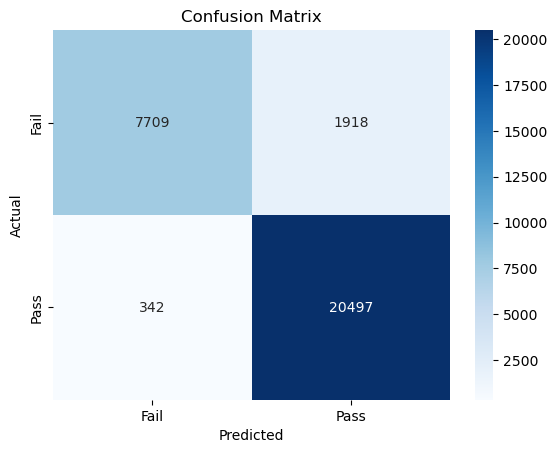

In [70]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get feature log probabilities
feature_log_probs = model.feature_log_prob_

# Create a dictionary with feature names and log probabilities
feature_log_probs_dict = {feature: log_prob for feature, log_prob in zip(feature_names, feature_log_probs[1])}

# Create a DataFrame with feature names and log probabilities
feature_log_probs_df = pd.DataFrame(list(feature_log_probs_dict.items()), columns=['Feature', 'Log Probability'])

# Sort the DataFrame by log probabilities in descending order
feature_log_probs_df = feature_log_probs_df.sort_values(by='Log Probability', ascending=False)

# Display the top n features in a table
top_n = 10
top_n_features_table = feature_log_probs_df.head(top_n)
print("\nTop Features and Log Probabilities:\n")
top_n_features_table


Top Features and Log Probabilities:



,Feature,Log Probability
90935,clean,-5.852209
107468,comment,-6.028167
367567,must,-6.096663
296863,instructed,-6.163651
230419,food,-6.167936
222058,floor,-6.184821
199260,equipment,-6.262399
473093,repair,-6.317947
17004,area,-6.373314
341496,maintain,-6.378288


In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

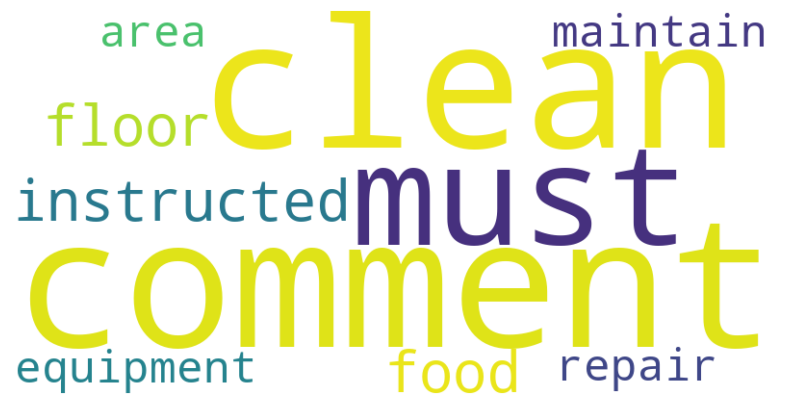

In [73]:
feature_coef_dict_logistic = dict(zip(top_n_features_table['Feature'], top_n_features_table['Log Probability']))
# Generate a word cloud from the top features and their coefficients
wordcloud_logistic = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(feature_coef_dict_logistic)

# Display the word cloud plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_logistic, interpolation='bilinear')
plt.axis('off')
plt.show()

**2. Logistic Regression Model**

In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [77]:
model_logistic = LogisticRegression(max_iter=100)
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Make predictions on the test set for Logistic Regression
predictions_logistic = model_logistic.predict(X_test)
# Evaluate the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, predictions_logistic)
classification_rep_logistic = classification_report(y_test, predictions_logistic)
print("Logistic Regression - Accuracy: {:.2f}%".format(accuracy_logistic * 100))
print("\nClassification Report:\n", classification_rep_logistic)


Logistic Regression - Accuracy: 97.74%

Classification Report:
               precision    recall  f1-score   support

        Fail       0.99      0.94      0.96      9627
        Pass       0.97      1.00      0.98     20839

    accuracy                           0.98     30466
   macro avg       0.98      0.97      0.97     30466
weighted avg       0.98      0.98      0.98     30466



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
conf_matrix_logistic = confusion_matrix(y_test, predictions_logistic)
# Print confusion matrix
print("\nConfusion Matrix for Logistic Regression:\n", conf_matrix_logistic)



Confusion Matrix for Logistic Regression:
 [[ 7910  1731]
 [  705 28064]]


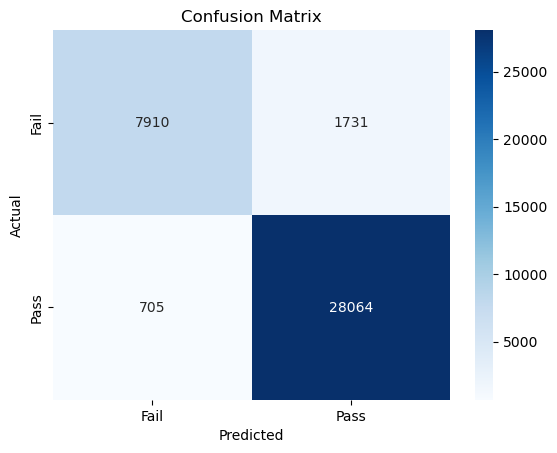

In [64]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [79]:
# Get feature names
feature_names_logistic = tfidf_vectorizer.get_feature_names_out()

# Get coefficients for Logistic Regression
coefficients_logistic = model_logistic.coef_[0]

# Create a DataFrame with feature names and coefficients
feature_coef_df_logistic = pd.DataFrame(list(zip(feature_names_logistic, coefficients_logistic)), columns=['Feature', 'Coefficient'])

# Filter only unigrams
top_n_features_logistic_unigrams = feature_coef_df_logistic[feature_coef_df_logistic['Feature'].apply(lambda x: len(x.split()) == 1)]

# Sort the DataFrame by coefficients in descending order
top_n_features_logistic_unigrams = top_n_features_logistic_unigrams.sort_values(by='Coefficient', ascending=False)

# Display the top 10 features
print("\nTop Unigram Features and Coefficients for Logistic Regression:\n")
top_n_features_logistic_unigrams.head(10)



Top Unigram Features and Coefficients for Logistic Regression:



,Feature,Coefficient
313265,label,5.156625
566124,stored,2.301936
531482,signage,2.296752
90935,clean,2.274643
250271,gasket,2.269983
66740,bulk,1.912876
265535,handle,1.854175
541063,slight,1.784390
134011,corrected,1.702512
550296,splash,1.669434


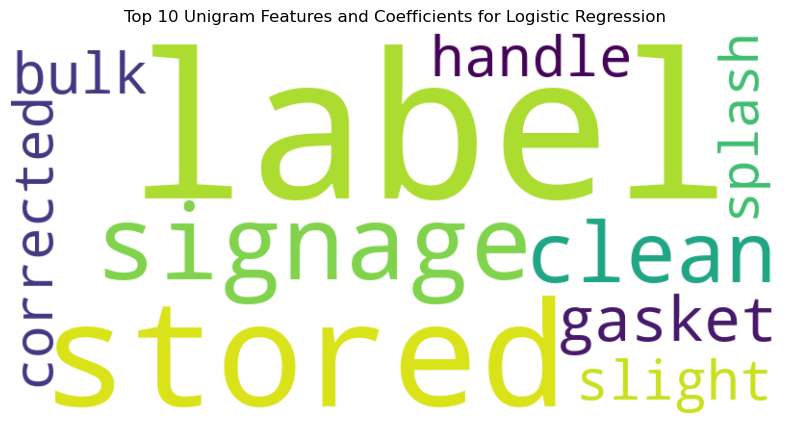

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the top 10 unigram features and coefficients
top_n_unigrams = top_n_features_logistic_unigrams.head(10)

# Create a dictionary with feature names as keys and coefficients as values
wordcloud_data = dict(zip(top_n_unigrams['Feature'], top_n_unigrams['Coefficient']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 Unigram Features and Coefficients for Logistic Regression')
plt.show()


**Best Model**

The Logistic Regression model outperforms the Multinomial Naive Bayes model in almost all metrics, including overall accuracy, precision, recall, and F1-score for both the "Fail" and "Pass" classes. This suggests that the Logistic Regression model is better at generalizing to unseen data and making accurate predictions.